## Hypothesis
To predict the incentive level requested to shut down or raise 5 degrees during the summer

DV: IncAwayS

IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg


In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];



#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$AwaySNY==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwayW"       "BillS"      
 [11] "BillW"       "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"    
 [16] "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"  
 [21] "ControlN2R"  "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"     
 [26] "ConvB3"      "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"    
 [31] "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"     
 [36] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HabitC"     
 [41] "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"    
 [46] "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"    
 [51] "HabitG"      "HomeS"       "HomeW"       "HouseholdS"  "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "IncWD"       "INT"         "INT1"        "INT2"       
 [71] "INT3"        "INT4"        "Latitude"    "MC"          "MC1"        
 [76] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [81] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
 [86] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [91] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [96] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
[101] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
[106] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[111] "Winter_avgF" "X.9to5"

In [2]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "17"   
[1] "AwayW" "33"   
[1] "IncWD" "38"   
[1] "IncDish" "141"    
[1] "Age" "3"  
[1] "Income" "2"     
[1] "Educ" "4"   
[1] "Latitude" "18"      
[1] "Summer_avgF" "28"         
[1] "Winter_avgF" "28"         
[1] "Summer_avgC" "28"         
[1] "Winter_avgC" "28"         
[1] "Summer_avg" "28"        
[1] "Winter_avg" "28"        


In [3]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 562 108
[1] 507 108


In [4]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [56] "IncAwayW"    "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W" 
 [61] "IncHomeS"    "IncHomeW"    "Income"      "INT"         "INT1"       
 [66] "INT2"        "INT3"        "INT4"        "Latitude"    "MC"         
 [71] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [76] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

In [5]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Attitude",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avgF",     
"HomeS",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [56] "IncAwayW"    "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W" 
 [61] "IncHomeS"    "IncHomeW"    "Income"      "INT"         "INT1"       
 [66] "INT2"        "INT3"        "INT4"        "Latitude"    "MC"         
 [71] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [76] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Attitude"    "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeS"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF" "Trust"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncAwayS",IVS))];
sort(names(data1))

[1] "Age"         "Attitude"    "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "IncAwayS"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Summer_avgF"

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [10]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncAwayS"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "Attitude"    "PBC"        
[16] "CashYN"      "MC"          "ComfNS"      "SubNorm"     "SN"         
[21] "HabitG"      "HabitC"      "Summer_avgF"

In [11]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [12]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.85
Summer_avgF,-0.85,1.00


In [13]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC Attitude   PBC    MC SubNorm HabitG HabitC
PC1  -0.21   -0.38    -0.42 -0.22 -0.33   -0.35   -0.3  -0.28
[1] 0.23
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.28 0.34    0.47     0.49       0.23   0.38
[1] 0.32
    HomeS Latitude ComfNS Summer_avgF
PC3 -0.27     0.56  -0.23       -0.56
[1] 0.39
    HomeS  Age Gender HouseholdS Ethnic Educ HabitC
PC4  0.23 0.22  -0.34      -0.52   0.36  0.4   0.26
[1] 0.45
    Political Ethnic Income  Educ EnergyC  PBC   MC HabitG
PC5      -0.5   0.21   -0.2 -0.41   -0.23 0.32 0.25   0.36
[1] 0.5
    IncAwayS   Age Ethnic EnergyC Attitude   PBC CashYN ComfNS   SN HabitC
PC6    -0.29 -0.29   -0.2    -0.2    -0.21 -0.21  -0.48  -0.25 0.25   0.41
[1] 0.54
    IncAwayS Age Gender Ethnic ComfNS
PC7    -0.57 0.3   0.23   0.33   0.49
[1] 0.59
     Age Gender Ethnic Income Educ CashYN ComfNS SubNorm   SN
PC8 -0.2  -0.33  -0.21   0.29 0.22   0.52   0.32     0.2 0.41
[1] 0.63
    HomeS IncAwayS Ethnic    MC SubNorm   SN
PC9

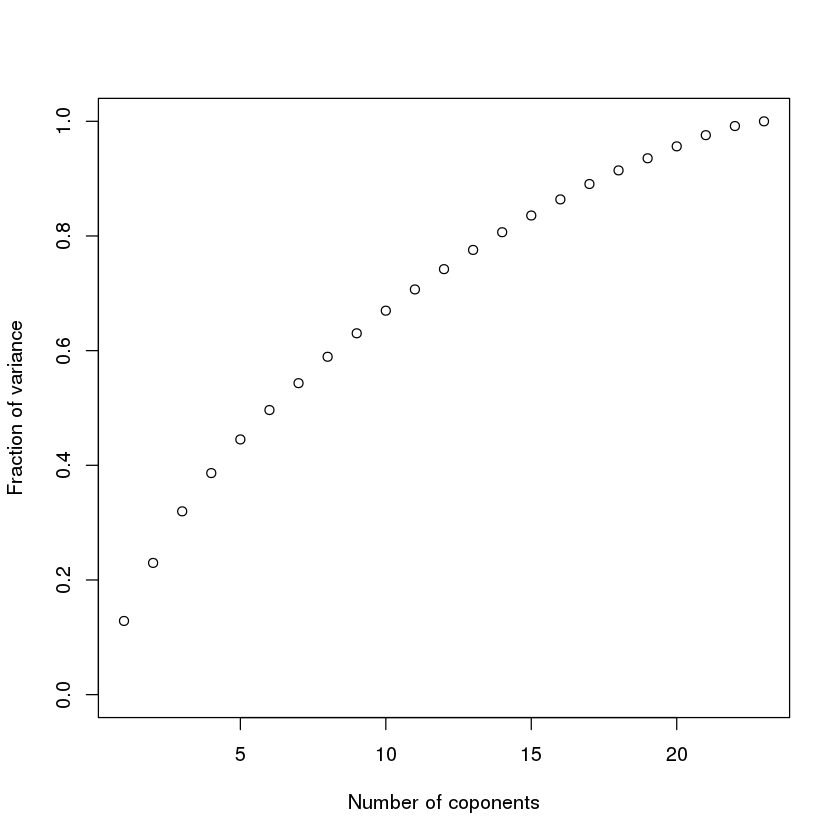

In [14]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [15]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [16]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,23.00,0.66
Latitude,12.00,0.65
Attitude,14.00,0.46
EnergyC,13.00,0.42
SqftCate,6.00,0.38
OwnRent,5.00,0.33
HouseholdS,7.00,0.27
Income,10.00,0.26
SubNorm,19.00,0.26
MC,17.00,0.25
HabitG,21.00,0.23


In [17]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncAwayS         Age      Gender     OwnRent    SqftCate 
       0.86        0.98        1.00        0.90        1.00        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.00        0.93        0.97        0.98        0.99        0.34 
    EnergyC    Attitude         PBC      CashYN          MC      ComfNS 
       0.51        0.40        0.93        1.00        0.79        0.94 
    SubNorm          SN      HabitG      HabitC Summer_avgF 
       0.75        0.93        0.85        0.89        0.04 

Loadings:
            Factor1 Factor2
EnergyC      0.70          
Attitude     0.76          
Latitude            -0.81  
Summer_avgF          0.98  
HomeS                0.38  
IncAwayS                   
Age                        
Gender       0.30          
OwnRent                    
SqftCate                   
HouseholdS                 
Political       

In [18]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [19]:
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 'PBC', 'SubNorm')

In [20]:
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [21]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.04  -2.31  -0.44   1.28  92.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.4621     3.3825    2.80   0.0054 **
Age          -0.0103     0.0323   -0.32   0.7502   
Income        0.0959     0.1936    0.50   0.6206   
Educ         -0.2920     0.3167   -0.92   0.3570   
OwnRent       0.9055     0.7692    1.18   0.2397   
SqftCate      0.2261     0.3591    0.63   0.5293   
EnergyC       0.1321     0.2988    0.44   0.6586   
MC            0.2515     0.3437    0.73   0.4647   
ComfNS       -0.5431     0.2399   -2.26   0.0240 * 
HabitC       -0.6334     0.2487   -2.55   0.0112 * 
Attitude     -0.8334     0.3884   -2.15   0.0324 * 
PBC           0.5720     0.3755    1.52   0.1284   
SubNorm       0.1238     0.2751    0.45   0.6529   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.4 on 494 degrees of freedom
Multiple R

In [22]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1.000,1.312,1.312,0.024,0.878
Income,1.00,39.08,39.08,0.71,0.40
Educ,1.00,72.37,72.37,1.31,0.25
OwnRent,1.00,137.70,137.70,2.49,0.12
SqftCate,1.00,13.66,13.66,0.25,0.62
EnergyC,1.00,30.92,30.92,0.56,0.46
MC,1.000,4.352,4.352,0.079,0.779
ComfNS,1.000,167.219,167.219,3.019,0.083
HabitC,1.000,360.396,360.396,6.506,0.011
Attitude,1.000,208.008,208.008,3.755,0.053


In [23]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.710 -1.483 -0.102  1.609  4.244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.88342    1.14706    3.39   0.0008 ***
Age          0.01501    0.01129    1.33   0.1843    
Income      -0.02569    0.06225   -0.41   0.6801    
Educ         0.08870    0.10536    0.84   0.4004    
OwnRent     -0.03784    0.25910   -0.15   0.8840    
SqftCate    -0.01752    0.12056   -0.15   0.8846    
EnergyC     -0.11229    0.09923   -1.13   0.2586    
MC          -0.05937    0.11829   -0.50   0.6161    
ComfNS       0.43610    0.08477    5.14  4.7e-07 ***
HabitC      -0.14612    0.08471   -1.73   0.0855 .  
Attitude     0.00336    0.13582    0.02   0.9803    
PBC         -0.09089    0.12705   -0.72   0.4749    
SubNorm      0.07803    0.09381    0.83   0.4061    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stan

In [24]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1.000,13.529,13.529,3.382,0.067
Income,1.00,0.72,0.72,0.18,0.67
Educ,1.000,0.044,0.044,0.011,0.917
OwnRent,1.00,1.92,1.92,0.48,0.49
SqftCate,1.0e+00,1.6e-04,1.6e-04,3.9e-05,1.0e+00
EnergyC,1.000,18.602,18.602,4.650,0.032
MC,1.00,5.56,5.56,1.39,0.24
ComfNS,1.0e+00,1.1e+02,1.1e+02,2.8e+01,1.8e-07
HabitC,1.000,11.395,11.395,2.848,0.092
Attitude,1.0000,0.0207,0.0207,0.0052,0.9427


In [25]:
#add CashYN to model
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Attitude', 'PBC', 'SubNorm', 'CashYN')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));

In [26]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -8.14  -2.29  -0.48   1.23  92.70 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   8.4019     3.4945    2.40    0.017 *
Age          -0.0116     0.0323   -0.36    0.719  
Income        0.0854     0.1937    0.44    0.660  
Educ         -0.3009     0.3166   -0.95    0.342  
OwnRent       0.9344     0.7692    1.21    0.225  
SqftCate      0.2388     0.3591    0.67    0.506  
EnergyC       0.1324     0.2987    0.44    0.658  
MC            0.2306     0.3439    0.67    0.503  
ComfNS       -0.5543     0.2400   -2.31    0.021 *
HabitC       -0.6123     0.2492   -2.46    0.014 *
Attitude     -0.8475     0.3884   -2.18    0.030 *
PBC           0.5593     0.3755    1.49    0.137  
SubNorm       0.1229     0.2750    0.45    0.655  
CashYNTRUE    1.4677     1.2229    1.20    0.231  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.4

In [27]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1.000,1.312,1.312,0.024,0.878
Income,1.00,39.08,39.08,0.71,0.40
Educ,1.00,72.37,72.37,1.31,0.25
OwnRent,1.00,137.70,137.70,2.49,0.12
SqftCate,1.00,13.66,13.66,0.25,0.62
EnergyC,1.00,30.92,30.92,0.56,0.46
MC,1.000,4.352,4.352,0.079,0.779
ComfNS,1.000,167.219,167.219,3.022,0.083
HabitC,1.000,360.396,360.396,6.512,0.011
Attitude,1.000,208.008,208.008,3.759,0.053


In [28]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.292 -1.467 -0.134  1.557  4.559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.20558    1.17875    2.72   0.0069 ** 
Age          0.01587    0.01122    1.41   0.1583    
Income      -0.03538    0.06200   -0.57   0.5687    
Educ         0.08190    0.10473    0.78   0.4348    
OwnRent     -0.03456    0.25746   -0.13   0.8933    
SqftCate    -0.00278    0.11997   -0.02   0.9816    
EnergyC     -0.10660    0.09863   -1.08   0.2806    
MC          -0.09715    0.11873   -0.82   0.4138    
ComfNS       0.43207    0.08425    5.13  5.1e-07 ***
HabitC      -0.13979    0.08422   -1.66   0.0979 .  
Attitude    -0.00414    0.13500   -0.03   0.9756    
PBC         -0.08942    0.12624   -0.71   0.4793    
SubNorm      0.08671    0.09329    0.93   0.3534    
CashYNTRUE   0.93146    0.41301    2.26   0.0248 *  
---
Signif. codes:  0 ‘***’ 

In [29]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1.000,13.529,13.529,3.425,0.065
Income,1.00,0.72,0.72,0.18,0.67
Educ,1.000,0.044,0.044,0.011,0.916
OwnRent,1.00,1.92,1.92,0.49,0.49
SqftCate,1.00000,0.00016,0.00016,0.00004,0.99499
EnergyC,1.000,18.602,18.602,4.709,0.031
MC,1.00,5.56,5.56,1.41,0.24
ComfNS,1.0e+00,1.1e+02,1.1e+02,2.9e+01,1.5e-07
HabitC,1.00,11.39,11.39,2.88,0.09
Attitude,1.0000,0.0207,0.0207,0.0052,0.9423


In [30]:
#add CashYN to model
IndepPred = c('Age', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 'SubNorm', 'Attitude', 'CashYN')
fmla <- as.formula(paste("IncAwayS",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-4.362 -1.448 -0.153  1.569  4.515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.23177    1.07364    3.01   0.0028 ** 
Age          0.01479    0.01004    1.47   0.1415    
EnergyC     -0.10188    0.09792   -1.04   0.2989    
MC          -0.08672    0.11738   -0.74   0.4605    
ComfNS       0.42792    0.08314    5.15  4.6e-07 ***
HabitC      -0.13713    0.08325   -1.65   0.1005    
PBC         -0.09365    0.12434   -0.75   0.4519    
SubNorm      0.08858    0.09271    0.96   0.3400    
Attitude    -0.00544    0.13376   -0.04   0.9676    
CashYNTRUE   0.93236    0.40915    2.28   0.0233 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2 on 322 degrees of freedom
Multiple R-squared:  0.129,	Adjusted R-squared:  0.105 
F-statistic: 5.31 on 9 and 322 DF,  p-value: 8.94e-07
